## Домашняя работа # 1.

## Image processing with openCV.

В этой домашней работе мы попробуем применить классические методы обработки изображений.

* Deadline: **23.02.2023 23:59:00 NSK**

In [1]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 1 (3 балла)
Переведите изображение **Печать.jpg** в цветовое пространство HSV, CIELab или YCbCr. Подберите пороги для нужных осей, чтобы получить изображение синей печати отдельно от чёрного текста. Переведите полученное изображение обратно в RGB и отобразите результат. 

(1188, 1680, 3)


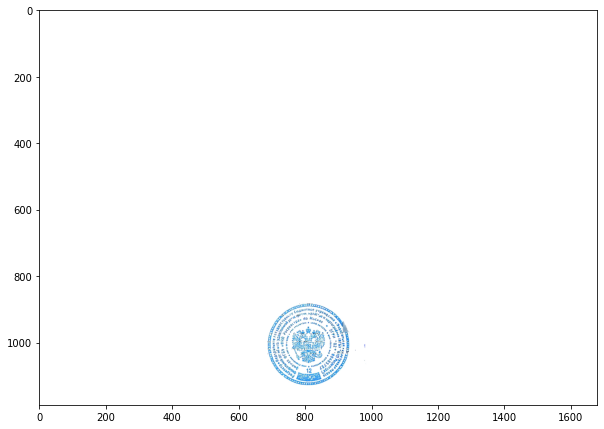

In [2]:
img = plt.imread('data/Печать.jpg')
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
copy_of_img = np.array(img)
print(img.shape)
mask = img_lab[:, :, 1] > 119
copy_of_img[mask, 0] = 255
copy_of_img[mask, 1] = 255
copy_of_img[mask, 2] = 255

plt.figure(figsize=(10, 10))
plt.imshow(copy_of_img);

##### Задача 2 (3 балла)
Переведите изображение **Книга.jpg** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

(540, 721, 3) (540, 721)


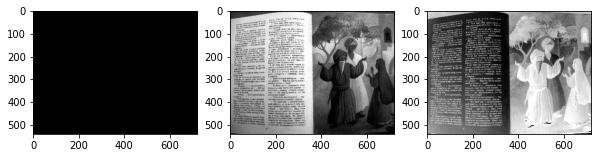

In [3]:
img = plt.imread('data/Книга.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img.shape, img_gray.shape)
img_norm = cv2.normalize(img_gray, None)
img_eqhist = cv2.equalizeHist(img_gray, None)

#img_concat = np.zeros(shape=img.shape, dtype=np.uint8)
#img_concat[:, :, 0] = img_norm
#img_concat[:, :, 1] = img_eqhist
#img_concat[:, :, 2] = img_norm - img_eqhist
#plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_RGB2GRAY));


f, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].imshow(img_norm, cmap='gray')
ax[1].imshow(img_eqhist, cmap='gray')
ax[2].imshow(img_norm - img_eqhist, cmap='gray');

##### Задача 3 (6 баллов) 
Выберите по два произвольных знаяения для каждого параметра гамма-коррекции ($\Gamma = ..$, $c = ..$). Получится 4 различных комбинации. Примените гамма-преобразование изображения **Книга.jpg** для каждой комбинации параметров. Отобразите исходное изображение **Книга.jpg** и его гамма-преобразования.

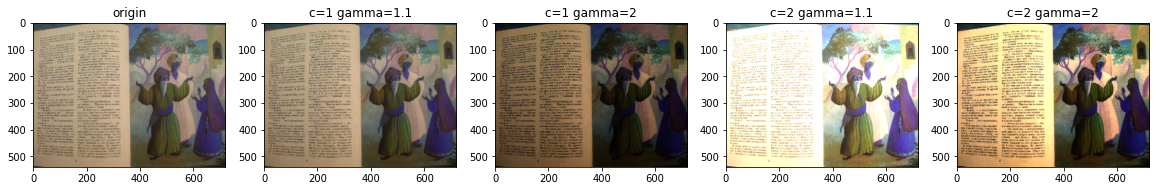

In [4]:
from itertools import product
img = cv2.imread('data/Книга.jpg')
img = img / 255

f, ax = plt.subplots(1, 5, figsize=(20, 30))
ax[0].imshow(img)
ax[0].title.set_text('origin')

for i, (c, gamma) in enumerate(product([1, 2], [1.1, 2]), 1):
    ax[i].imshow(np.clip(c * np.power(img, gamma), 0, 1))
    ax[i].title.set_text(f'c={c} gamma={gamma}')

##### Задача 4 (10 баллов)

Загрузите изображение **Лена.jpg**. Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображения (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: `dft`, `mulSpectrums`, `idft`.

In [5]:
img = plt.imread('data/lena.jpg', 0)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
dft = cv2.dft(np.float32(img_gray))

-----------------------dist = 5-------------------


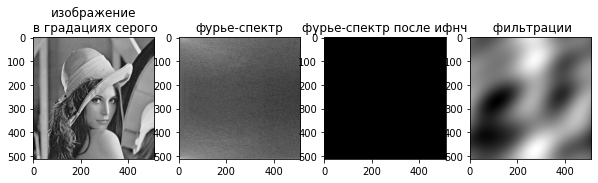

-----------------------dist = 15-------------------


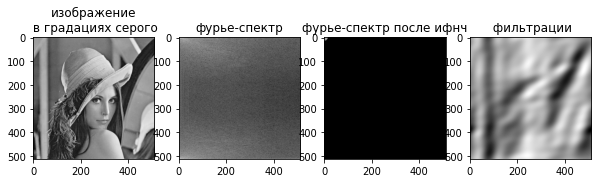

-----------------------dist = 30-------------------


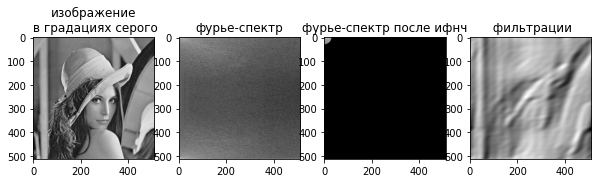

-----------------------dist = 255-------------------


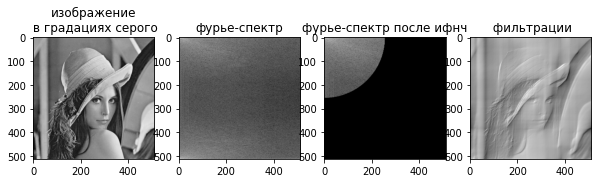

-----------------------dist = 5-------------------


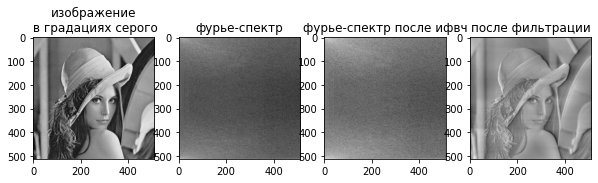

-----------------------dist = 15-------------------


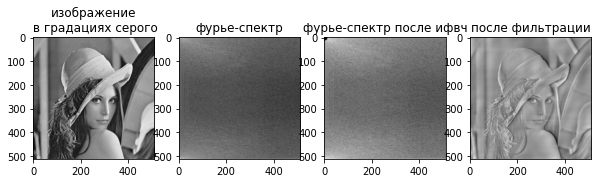

-----------------------dist = 30-------------------


-----------------------dist = 255-------------------


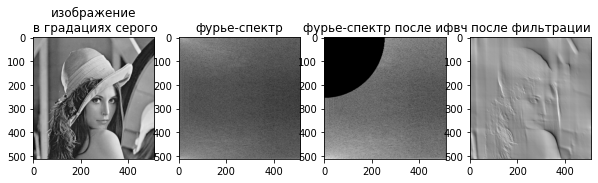

In [6]:
def create_filters(img_gray, dist):
    ilpf = np.zeros(shape=img.shape[:2], dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.sqrt(i ** 2 + j ** 2) <= dist:
                ilpf[i, j] = 1
    return ilpf, 1 - ilpf
            
for dist in (5, 15, 30, 255):
    print(f'-----------------------dist = {dist}-------------------')
    f, ax = plt.subplots(1, 4, figsize=(10, 4))
    ax[0].imshow(img_gray, cmap='gray')
    ax[1].imshow(20 * np.log1p(1 + np.abs(dft)), cmap='gray')
    ilpf, _ = create_filters(img_gray, dist)
    corr_img = cv2.mulSpectrums(dft, np.float32(ilpf), 0)
    ax[2].imshow(20 * np.log1p(1 + np.abs(corr_img)), cmap='gray')
    ax[3].imshow(cv2.idft(corr_img), cmap='gray')
    
    ax[0].set_title('изображение\n в градациях серого')
    ax[1].set_title('фурье-спектр')
    ax[2].set_title('фурье-спектр после ифнч')
    ax[3].set_title(' фильтрации')
    
    plt.show()
    
    
for dist in (5, 15, 30, 255):
    print(f'-----------------------dist = {dist}-------------------')
    f, ax = plt.subplots(1, 4, figsize=(10, 4))
    ax[0].imshow(img_gray, cmap='gray')
    ax[1].imshow(20 * np.log1p(1 + np.abs(dft)), cmap='gray')
    _, ihpf = create_filters(img_gray, dist)
    corr_img = cv2.mulSpectrums(dft, np.float32(ihpf), 0)
    ax[2].imshow(20 * np.log1p(1 + np.abs(corr_img)), cmap='gray')
    ax[3].imshow(cv2.idft(corr_img), cmap='gray')
    
    ax[0].set_title('изображение\n в градациях серого')
    ax[1].set_title('фурье-спектр')
    ax[2].set_title('фурье-спектр после ифвч')
    ax[3].set_title('после фильтрации')
    plt.show()

##### Задача 5 (3 балла)
Выделите в изображении **table.jpg** границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором присутствует текст и удалены все стороны таблицы.

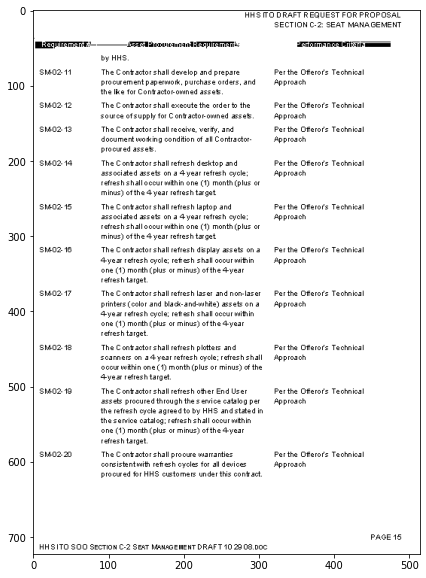

In [7]:
img = cv2.imread('data/table.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

def find_main_lines(img_bin, type):
    if type == 'h':
        structuring_element = np.ones((1, 50), np.uint8)
    elif type == 'v':
        structuring_element = np.ones((50, 1), np.uint8)
    erode_image = cv2.erode(img_bin, structuring_element, iterations=1)
    dilate_image = cv2.dilate(erode_image, structuring_element, iterations=1)
    return dilate_image

def merge_lines(horizontal_lines, vertical_lines):
    structuring_element = np.ones((3, 3), np.uint8)
    merge_image = horizontal_lines + vertical_lines
    merge_image = cv2.dilate(merge_image, structuring_element, iterations=2)
    return merge_image

mask = (img_bin - (find_main_lines(img_bin, 'h') + find_main_lines(img_bin, 'v'))) <= 25

img[mask, 0] = 255
img[mask, 1] = 255
img[mask, 2] = 255

plt.figure(figsize=(10, 10))
plt.imshow(img)